## Pandas

### pandas 기본 1. 『 Series 』 행×값 데이터 

In [4]:
import pandas as pd

In [6]:
# 주가 데이터를 불러오고, sereis 하나 고르기
stock_data = pd.read_csv('stock.adj_close.csv',index_col=0)
# A005930 : 삼성전자
# 2020년 9월 9일 이후 데이터
samsung = stock_data.loc['A005930']['2020-09-09':]

In [7]:
samsung # Series

2020-09-09    58400.0
2020-09-10    59200.0
2020-09-11    59000.0
2020-09-14    60400.0
2020-09-15    61000.0
2020-09-16    61000.0
2020-09-17    59500.0
2020-09-18    59300.0
Name: A005930, dtype: float64

In [65]:
my_series.index    # Series의 인덱스 보기

Index(['2020-09-09', '2020-09-10', '2020-09-11', '2020-09-14', '2020-09-15',
       '2020-09-16', '2020-09-17', '2020-09-18'],
      dtype='object')

In [8]:
samsung.index # Seriese의 인덱스 보기

Index(['2020-09-09', '2020-09-10', '2020-09-11', '2020-09-14', '2020-09-15',
       '2020-09-16', '2020-09-17', '2020-09-18'],
      dtype='object')

In [9]:
samsung.name    # Series의 이름 보기

'A005930'

In [11]:
type(samsung)    # 타입 확인하기

pandas.core.series.Series

### pandas 기본 2. 『 Series 』   접근, 연산, 생성

In [13]:
samsung.loc['2020-09-15']   # 인덱스로 접근

61000.0

In [14]:
samsung.iloc[4]    # 배열 번호로 접근

61000.0

In [15]:
samsung.loc['2020-09-15':'2020-09-17']  # 인덱스로 Slicing

2020-09-15    61000.0
2020-09-16    61000.0
2020-09-17    59500.0
Name: A005930, dtype: float64

In [16]:
samsung.iloc[4:7]    # 배열 번호로 Slicing (끝 포함 X)

2020-09-15    61000.0
2020-09-16    61000.0
2020-09-17    59500.0
Name: A005930, dtype: float64

In [18]:
samsung.iloc[4:] + samsung.iloc[4:]

2020-09-15    122000.0
2020-09-16    122000.0
2020-09-17    119000.0
2020-09-18    118600.0
Name: A005930, dtype: float64

In [19]:
# loc[시작위치,끝위치, 간격]
samsung.loc['2020-09-15'::2] + 30000  # Scalar Broadcasting

2020-09-15    91000.0
2020-09-17    89500.0
Name: A005930, dtype: float64

In [20]:
samsung.iloc[4:].mean()    # 평균 aggregation

60200.0

In [21]:
# Series 만들기
new_sr = pd.Series([11,22,3,45], name='apple',
                   index=['a','b','xs','e11'])
new_sr

a      11
b      22
xs      3
e11    45
Name: apple, dtype: int64

### pandas 기본 3. 『 DataFrame 』 행×열 데이터 

In [26]:
# 불러온 주가 데이터에서 불러오고, dataframe 하나를 추출합니다.
my_df = stock_data.T.loc['2020-09-09':,'A005900':'A006000']

In [27]:
my_df

Symbol,A005930,A005940,A005950,A005960,A005980,A005990
2020-09-09,58400.0,9190.0,9080.0,11000.0,671.0,7990.0
2020-09-10,59200.0,9280.0,9280.0,11150.0,671.0,7960.0
2020-09-11,59000.0,9270.0,9360.0,11050.0,671.0,8120.0
2020-09-14,60400.0,9370.0,9400.0,11200.0,671.0,8200.0
2020-09-15,61000.0,9470.0,9390.0,11350.0,671.0,8180.0
2020-09-16,61000.0,9530.0,9080.0,11250.0,671.0,8180.0
2020-09-17,59500.0,9320.0,8880.0,11000.0,671.0,8000.0
2020-09-18,59300.0,9320.0,9070.0,10850.0,671.0,8020.0


### pandas 기본 4. 『 DataFrame 』  접근

In [28]:
my_df.loc['2020-09-15', 'A005930']   # .loc 단일 원소 접근

61000.0

In [29]:
# .loc [ 인덱스, 컬럼 slice ] 로 접근  →  Series 반환
my_df.loc['2020-09-15', 'A005930':'A005950']

Symbol
A005930    61000.0
A005940     9470.0
A005950     9390.0
Name: 2020-09-15, dtype: float64

In [30]:
# .loc [ 인덱스 slice, 컬럼이름 ] 으로 접근  →  Series 반환
my_df.loc['2020-09-15':'2020-09-18', 'A005930']

2020-09-15    61000.0
2020-09-16    61000.0
2020-09-17    59500.0
2020-09-18    59300.0
Name: A005930, dtype: float64

In [31]:
# .loc [ index slice, column slice ]  →  DataFrame 반환
my_df.loc['2020-09-14':'2020-09-18':2, 'A005940':'A005980']

Symbol,A005940,A005950,A005960,A005980
2020-09-14,9370.0,9400.0,11200.0,671.0
2020-09-16,9530.0,9080.0,11250.0,671.0
2020-09-18,9320.0,9070.0,10850.0,671.0


In [32]:
# .iloc [ index, column slice ]  으로 접근  →  Series 반환
my_df.iloc[0, 3:]  

Symbol
A005960    11000.0
A005980      671.0
A005990     7990.0
Name: 2020-09-09, dtype: float64

In [33]:
#  .iloc [ index slice, column slice ]  →  DataFrame 반환
my_df.iloc[4:7:2, 1:4]

Symbol,A005940,A005950,A005960
2020-09-15,9470.0,9390.0,11350.0
2020-09-17,9320.0,8880.0,11000.0


### pandas 기본 5. 『 DataFrame 』  접근 2,  연산

In [34]:
# ::으로 모든 원소 지칭
my_df.loc[::, 'A005930']

2020-09-09    58400.0
2020-09-10    59200.0
2020-09-11    59000.0
2020-09-14    60400.0
2020-09-15    61000.0
2020-09-16    61000.0
2020-09-17    59500.0
2020-09-18    59300.0
Name: A005930, dtype: float64

In [35]:
# : 한번만 사용 가능
my_df.iloc[5, :]

Symbol
A005930    61000.0
A005940     9530.0
A005950     9080.0
A005960    11250.0
A005980      671.0
A005990     8180.0
Name: 2020-09-16, dtype: float64

In [36]:
# shape 보기
my_df.iloc[5, :].shape

(6,)

In [46]:
my_df

Symbol,A005930,A005940,A005950,A005960,A005980,A005990
2020-09-09,58400.0,9190.0,9080.0,11000.0,671.0,7990.0
2020-09-10,59200.0,9280.0,9280.0,11150.0,671.0,7960.0
2020-09-11,59000.0,9270.0,9360.0,11050.0,671.0,8120.0
2020-09-14,60400.0,9370.0,9400.0,11200.0,671.0,8200.0
2020-09-15,61000.0,9470.0,9390.0,11350.0,671.0,8180.0
2020-09-16,61000.0,9530.0,9080.0,11250.0,671.0,8180.0
2020-09-17,59500.0,9320.0,8880.0,11000.0,671.0,8000.0
2020-09-18,59300.0,9320.0,9070.0,10850.0,671.0,8020.0


In [38]:
# 5행부터 끝행까지, 시작열에서 3의 간격의 열
my_df.iloc[5:, ::3]

Symbol,A005930,A005960
2020-09-16,61000.0,11250.0
2020-09-17,59500.0,11000.0
2020-09-18,59300.0,10850.0


In [39]:
my_df.iloc[5:, ::3].shape

(3, 2)

In [40]:
my_df.iloc[::4].loc[:, 'A005950':]

Symbol,A005950,A005960,A005980,A005990
2020-09-09,9080.0,11000.0,671.0,7990.0
2020-09-15,9390.0,11350.0,671.0,8180.0


In [41]:
my_df.loc['2020-09-09'::4].iloc[:,2:]

Symbol,A005950,A005960,A005980,A005990
2020-09-09,9080.0,11000.0,671.0,7990.0
2020-09-15,9390.0,11350.0,671.0,8180.0


In [42]:
my_df_2 = my_df.loc[:'2020-09-11','A005960':]

In [43]:
my_df_2

Symbol,A005960,A005980,A005990
2020-09-09,11000.0,671.0,7990.0
2020-09-10,11150.0,671.0,7960.0
2020-09-11,11050.0,671.0,8120.0


In [44]:
my_df_2 * 1.30   # Broadcasting

Symbol,A005960,A005980,A005990
2020-09-09,14300.0,872.3,10387.0
2020-09-10,14495.0,872.3,10348.0
2020-09-11,14365.0,872.3,10556.0


In [45]:
my_df_2.mean(axis=0)  # 평균 Agg

Symbol
A005960    11066.666667
A005980      671.000000
A005990     8023.333333
dtype: float64

### pandas 기본 6. 『 DataFrame 』  연산 2,  정렬

In [47]:
# Nan값 확인
my_df_2.notna()

Symbol,A005960,A005980,A005990
2020-09-09,True,True,True
2020-09-10,True,True,True
2020-09-11,True,True,True


In [48]:
my_df_2.sum(axis=0)

Symbol
A005960    33200.0
A005980     2013.0
A005990    24070.0
dtype: float64

In [49]:
my_df_2.median(axis=1)

2020-09-09    7990.0
2020-09-10    7960.0
2020-09-11    8120.0
dtype: float64

In [51]:
my_df_2

Symbol,A005960,A005980,A005990
2020-09-09,11000.0,671.0,7990.0
2020-09-10,11150.0,671.0,7960.0
2020-09-11,11050.0,671.0,8120.0


In [50]:
# 행별 누적합
my_df_2.cumsum(axis=0)

Symbol,A005960,A005980,A005990
2020-09-09,11000.0,671.0,7990.0
2020-09-10,22150.0,1342.0,15950.0
2020-09-11,33200.0,2013.0,24070.0


In [52]:
# A005990 기준으로 내림차순 (행의 순서가 변함)
my_df_2.sort_values('A005990', axis=0, ascending=True)

Symbol,A005960,A005980,A005990
2020-09-10,11150.0,671.0,7960.0
2020-09-09,11000.0,671.0,7990.0
2020-09-11,11050.0,671.0,8120.0


In [53]:
# 2020-09-11 행 기준으로 오름차순 (컬럼의 순서가 변함)
my_df_2.sort_values('2020-09-11', axis='columns', ascending=True)

Symbol,A005980,A005990,A005960
2020-09-09,671.0,7990.0,11000.0
2020-09-10,671.0,7960.0,11150.0
2020-09-11,671.0,8120.0,11050.0


In [54]:
my_df_2.rank(axis=0, ascending=False)

Symbol,A005960,A005980,A005990
2020-09-09,3.0,2.0,2.0
2020-09-10,1.0,2.0,3.0
2020-09-11,2.0,2.0,1.0


### pandas 기본 7. 『 DataFrame 』  만들기,  행 열 추가하기

In [55]:
# 데이터 인덱스, 컬럼으로 DataFrame 생성하기
pd.DataFrame([[0,1,2],[3,4,5]], 
             index=['00','11'],
             columns=['a','b','c'])

,a,b,c
00,0,1,2
11,3,4,5


In [56]:
import numpy as np
# 넘파이 배열로 DataFrame 생성하기
pd.DataFrame(np.ones((3,5)))

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0


In [57]:
trafic_data = pd.DataFrame(
    [[9800,5500],[10200,6600]],
    index=['10/22','10/23'],
    columns=['원티드','사람인'])
trafic_data   # trafic_data 라는 DataFrame 생성

,원티드,사람인
10/22,9800,5500
10/23,10200,6600


#### 새로운 열 추가

In [58]:
# 새로운 '잡플래닛' 열 (빈 데이터) 추가하기
trafic_data.loc[:,'잡플래닛'] = np.nan
trafic_data

,원티드,사람인,잡플래닛
10/22,9800,5500,NaN
10/23,10200,6600,NaN


In [59]:
# 새로운 '잡코리아' 열 데이터 추가하기
trafic_data.loc[:,'잡코리아'] = [980, 1020]
trafic_data

,원티드,사람인,잡플래닛,잡코리아
10/22,9800,5500,NaN,980
10/23,10200,6600,NaN,1020


In [60]:
# 숫자를 하나만 주면 broadcast 된다.
trafic_data.loc[:,'스펙업'] = 20000
trafic_data

,원티드,사람인,잡플래닛,잡코리아,스펙업
10/22,9800,5500,NaN,980,20000
10/23,10200,6600,NaN,1020,20000


#### 새로운 행 추가

In [61]:
# 새로운 10/24 행 데이터추가하기
trafic_data.loc['10/24'] = [12500,4520,3000,
                           780, 21000]
trafic_data

,원티드,사람인,잡플래닛,잡코리아,스펙업
10/22,9800,5500,NaN,980,20000
10/23,10200,6600,NaN,1020,20000
10/24,12500,4520,3000.0,780,21000


In [62]:
# 값을 하나만 지정하면, broadcast 된다
trafic_data.loc['10/25'] = 2000
trafic_data

,원티드,사람인,잡플래닛,잡코리아,스펙업
10/22,9800,5500,NaN,980,20000
10/23,10200,6600,NaN,1020,20000
10/24,12500,4520,3000.0,780,21000
10/25,2000,2000,2000.0,2000,2000


In [63]:
trafic_data.loc['10/22', '잡플래닛'] = 99
trafic_data

,원티드,사람인,잡플래닛,잡코리아,스펙업
10/22,9800,5500,99.0,980,20000
10/23,10200,6600,NaN,1020,20000
10/24,12500,4520,3000.0,780,21000
10/25,2000,2000,2000.0,2000,2000


### matplotlib으로 그래프 그리기

In [111]:
# matplotlib 임포트,  주피터 출력설정,  한글 글꼴 지정
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic') # Windows
#plt.rc('font', family='AppleGothic') # Mac

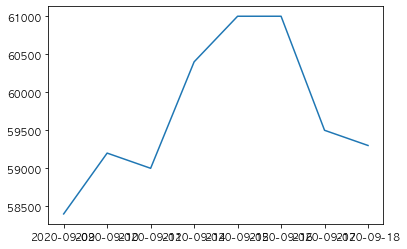

In [57]:
my_df.loc[:,'A005930'].plot();  # Series 그래프

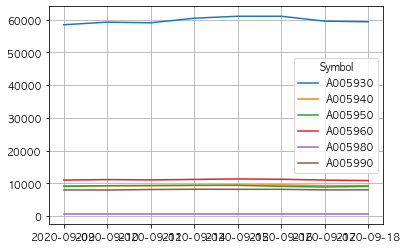

In [58]:
my_df.plot(grid=True);  # DataFrame 그래프

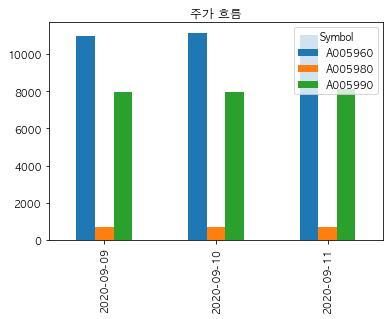

In [59]:
my_df_2.plot(kind='bar', title='주가 흐름');

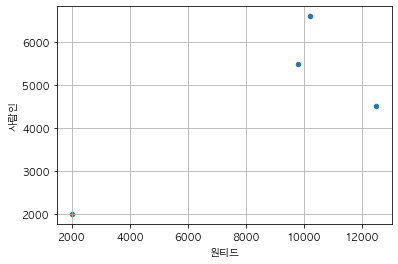

In [60]:
trafic_data.plot(kind='scatter', grid=True,
                 x='원티드', y='사람인');

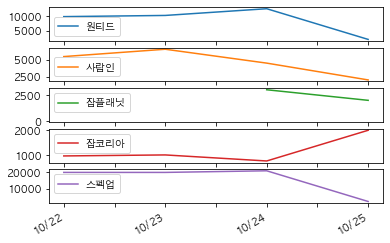

In [61]:
trafic_data.plot(subplots=True);